<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> <h1>Tarea Semanal 12: Sintesis de Cuadripolos</h1></center>
<h3> Teoría de circuitos 2 </h3>
<h3> 2do Cuatrimestre 2023 </h3>    
<h3> Facundo N. Iglesias </h3>    
</div>

<div class="alert alert-success text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>INDICE</h1></center>
    
</div>

0. [LIBRERIAS](#lib)

1. [PARTE 1](#parte1)

2. [PARTE 2](#parte2)
    
3. [ANEXO](#anexo)
    

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="lib">
        <h1> LIBRERIAS</h1>
    </a> 
</center>
</div>

In [2]:
#Numeric
import numpy as np
from numpy import sqrt
#Simbolic
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from sympy.solvers import solve
#Visual & graphs
from IPython.display import IFrame, display, Math
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import IFrame, display, Math
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
#Simulation
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
from pytc2.sistemas_lineales import plot_plantilla, group_delay
import scipy.io as sio
import warnings
warnings.filterwarnings('ignore')
#Sintesis
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion, dibujar_cauer_LC
from pytc2.general import print_latex
from pytc2.remociones import remover_valor, remover_polo_sigma, remover_valor_en_infinito, remover_polo_infinito, remover_polo_dc 
from pytc2.remociones import remover_polo_jw,remover_valor_en_dc
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor,dibujar_tanque_RC_derivacion, dibujar_elemento_derivacion
from pytc2.dibujar import Capacitor, Inductor, dibujar_elemento_derivacion, dibujar_tanque_derivacion, dibujar_tanque_RC_serie, dibujar_puerto_salida
from pytc2.remociones import remover_polo_infinito

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="parte1">
        <h1> PARTE 1</h1>
    </a> 
</center>
</div>


<img src="./rsc/consigna1.png" align="center" width="1196" height="599" /> 

<a name="1">
   <h2>Simulación simbólica</h2>
</a>

A continuación se realizará la verificación paso por paso del método gráfico y el algebra realizada a mano (ver anexo al final del documento). Para ello se emplean funciones de la librería de la catedra "PyTc2" para calcular los residuos y las inmitancias obtenidas en cada remoción.

Premisas que condicionan la sintesis:

* Parámetros Y
* Condición de medición en corto circuito: Último elemento en serie.
* Generador de tensión: Primer elemento en serie.

\begin{equation}
H(s) = \frac{Y_{21}}{Y_{11}} = \frac{s(s²+1)}{3s(s²+\frac{7}{3})}
\end{equation}

Condiciones necesarias:

* Y12: Estable
* Y11: FRP

Polinomio auxiliar utilizado:

\begin{equation}
P = (s²+2)(s²+5)
\end{equation}

Parámetros Y:

\begin{equation}
Y_{21} = \frac{s(s²+1)}{(s²+2)(s²+5)} 
\end{equation}

\begin{equation}
Y_{11} = \frac{3s(s²+\frac{7}{3})}{(s²+2)(s²+5)} 
\end{equation}

Se procederá a realizar la sintesis de Y11 a partir de los ceros de transmisión de la transferencia que coinciden con los de Y21.

### Resolución simbólica

En primer lugar definimos la función Y11:

In [113]:
s = sp.symbols('s ', complex=True)
Y11 = (3*s*(s**2+sp.Rational('7/3')))/((s**2+2)*(s**2+5))
Y11

3*s*(s**2 + 7/3)/((s**2 + 2)*(s**2 + 5))

##### 1era remoción PARCIAL: Capacitor serie para ubicar cero de transmisión en omega=1

In [127]:
Z=1/Y11
omega1= 1
Z2, Z1 = remover_polo_dc(Z, omega_zero=omega)
C1 = Z1*s
print("Se removió un capacitor de valor:")
display(C1)
print("Obteniendo la siguiente Z2:")
display(Z2)

Se removió un capacitor de valor:


1

Obteniendo la siguiente Z2:


(s**2 + 1)*(s**2 + 3)/(s*(3*s**2 + 7))

##### 2da remoción TOTAL: Tanque serie en derivación resonante en 1 rad/s

In [128]:
Y2 = 1/Z2
Y4, Y5, L1, C2 = remover_polo_jw(Y2, omega1 , isImpedance=False)
print("La admitancia removida es: ")
display(Y5)
print("Compuesta por un capacitor de: ")
display(C2)
print("Y un inductor de: ")
display(L1)
print("Y como resultado nos queda la admitancia Y4: ")
display(Y4)

La admitancia removida es: 


2*s/(s**2 + 1)

Compuesta por un capacitor de: 


2

Y un inductor de: 


1/2

Y como resultado nos queda la admitancia Y4: 


s/(s**2 + 3)

##### 3ra remoción TOTAL: Inductor en serie (polo de impedancia en infinito)

In [143]:
Z4 = 1/Y4
Z6, Z5 = remover_polo_infinito(Z4)
L2 = Z5/s
print("Se removió un inductor de valor ")
display(L2)
print("Quedando la impedancia: ")
display(Z6)

Se removió un inductor de valor 


1

Quedando la impedancia: 


3/s

##### 4ta remoción TOTAL: Capacitor en serie  (polo de impedancia en cero para terminar en serie) 

In [148]:
Z8, Z7 = remover_polo_dc(Z6)
C3 = 1/Z7/s
C3
print("Se removió un capacitor de valor ")
display(C3)
print("Y ya no quedan elementos por remover")
display(Z8)

Se removió un capacitor de valor 


1/3

Y ya no quedan elementos por remover


0

La sintesis no es canónica porque se realizaron remociones parciales dando una mayor cantidad de componentes que los minimos para la implementación de la transferencia.

<a name="1">
   <h2>Red Resultante</h2>
</a>
Dibujamos la red utilizando las funciones de la librería de la catedra:

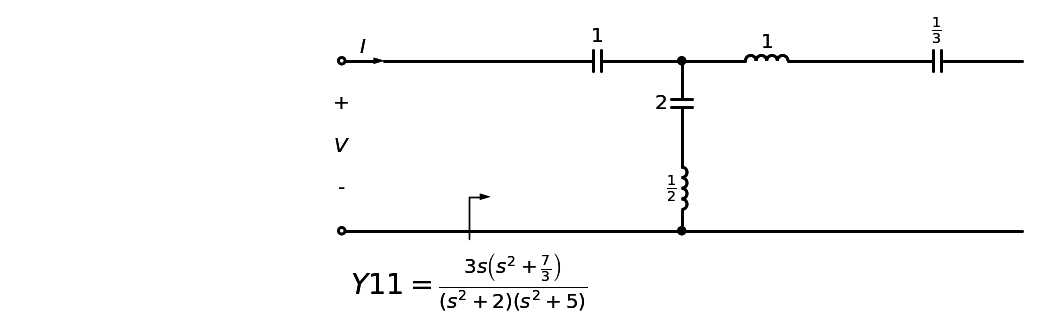

In [151]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')
d, yy_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Y11',  
                                          Y11, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, C1)

d = dibujar_tanque_derivacion(d, L1, C2)
    
d = dibujar_elemento_serie(d, Inductor, L2)

d = dibujar_elemento_serie(d, Capacitor, C3)

display(d)

<a name="1">
   <h2>Simulación circuital</h2>
</a>
Se realiza una simulación circuital en LtSpice para verificar los parámetros de red:

<img src="./rsc/sim/ej1_modulo_y22-y21.png" align="center" width="1196" height="599" />   

Podemos observar los polos coincidentes en Y22 e Y21 y los ceros de transmisión en 159 mHz (s=j1) y en continua que a su vez coinciden con los de la transferencia  

<img src="./rsc/sim/ej1_mod-fase_trans.png" align="center" width="1196" height="599" />   

Analizando la respuesta en frecuencia de la transferencia observamos que es un filtro Notch pasa-altos con sus respectivos ceros de transmisión en 1rad/s y en continua.

-----

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="parte2">
        <h1> PARTE 2</h1>
    </a> 
</center>
</div>


<img src="./rsc/consigna2.png" align="center" width="1196" height="599" />   

<a name="1">
   <h2>Parámetros Z</h2>
</a>

Premisas que condicionan la sintesis:

* Parámetros Z
* Condición de medición circuito abiero: I2=0 ultimo elemento en derivación.
* Generador de tensión: Primer elemento en serie.
* Sintesis con ZRC para evitar inductores

\begin{equation}
Z_0>Z_{\infty}
\end{equation}

Transferencia:

\begin{equation}
H(s) = \frac{Z_{21}}{Z_{11}} = k\frac{s+1}{(s+2)(s+4)}
\end{equation}

Condiciones necesarias:

* Z12: Estable
* Z11: FRP

Polinomio auxiliar utilizado:

\begin{equation}
P = (s+1)(s+3)
\end{equation}

Parámetros Z:

\begin{equation}
Z_{21} = k\frac{s+1}{(s+1)(s+3)} 
\end{equation}

\begin{equation}
Z_{11} = \frac{(s+2)(s+4)}{(s+1)(s+3)} 
\end{equation}

Se procederá a realizar la sintesis de Z11 a partir de los ceros de transmisión de la transferencia que coinciden con los de Z21.

Primero definimos la función de excitación simbólica

In [154]:
s = sp.symbols('s ', complex=True)
Z11 = ((s+2)*(s+4))/((s+1)*(s+3))
Z11

(s + 2)*(s + 4)/((s + 1)*(s + 3))

##### 1ra remoción TOTAL: Tanque RC serie resonante en 1 rad/s

In [161]:
Z2, Z1, R1, C1 = remover_polo_sigma(Z11, sigma=1 ,isImpedance=True)
print("La impedancia removida es: ")
display(Z1)
print("Compuesta por un capacitor de valor: ")
display(C1)
print("Y una resistencia de valor: ")
display(R1)
print("La impedancia resultante es igual a: ")
display(Z2)

La impedancia removida es: 


3/(2*(s + 1))

Compuesta por un capacitor de valor: 


2/3

Y una resistencia de valor: 


3/2

La impedancia resultante es igual a: 


(2*s + 7)/(2*(s + 3))

##### 2da remoción TOTAL: Resistencia serie (Valor constante en infinito completo)

In [166]:
Z4, Z3 = remover_valor_en_infinito(Z2)
R2 = Z3
print("Se removió una resistencia de valor: ")
display(R2)
print("Quedando una impedancia resultante: ")
display(Z4)

Se removió una resistencia de valor: 


1

Quedando una impedancia resultante: 


1/(2*(s + 3))

##### 3ra remoción TOTAL: Resistencia en derivación  (Valor constante en cero completo)

In [168]:
Y4 = 1/Z4
Y6, Y5 = remover_valor_en_dc(Y4)
R3 = 1/Y5
print("Se removió una resistencia de valor: ")
display(R3)
print("Quedando una admitancia resultante: ")
display(Y6)

Se removió una resistencia de valor: 


1/6

Quedando una admitancia resultante: 


2*s

##### 4ta remoción TOTAL: Capacitor en derivación  por condición de cierre (Polo en infinito)

In [173]:
Y8, Y6 = remover_polo_infinito(Y6)
C2=Y6/s
print("Se removió un capacitor de valor: ")
display(C2)
print("Luego no quedan componentes para remover ")
display(Y8)

Se removió un capacitor de valor: 


2

Luego no quedan componentes para remover 


0

### Red resultante:

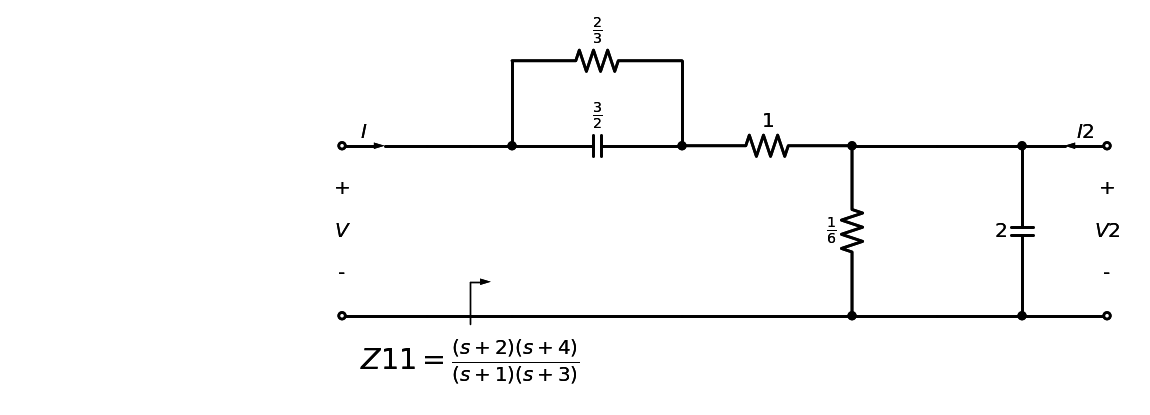

In [183]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z11',  
                                          Z11, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_tanque_RC_serie(d, C1, R1)
d = dibujar_elemento_serie(d, Resistor, R2)
d = dibujar_elemento_derivacion(d, Resistor, R3)
d = dibujar_espacio_derivacion(d)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, Capacitor, C2)
d = dibujar_puerto_salida(d, 
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')
display(d)

### Simulación Circuital:

Procedemos a simular la transferencia del circuito implementado partiendo de los parámetros Z.

<img src="./rsc/sim/ej2-z.png" align="center" width="1196" height="599" />   

Se observa que la respuesta en frecuencia corresponde con la de un filtro pasa-bajos con atenuación en la banda de paso y sin maxima planicidad debido al Q. 

<a name="1">
   <h2>Parámetros Y</h2>
</a>

Premisas que condicionan la sintesis:

* Parámetros Y
* Sintesis desde la salida
* Condición de medición circuito abiero: I2=0 ultimo elemento en derivación.
* Generador de tensión: Primer elemento en serie.
* Sintesis con YRC para evitar inductores

\begin{equation}
Y_{\infty}>Y_0
\end{equation}

Transferencia:

\begin{equation}
H(s) = \frac{Z_{21}}{Z_{11}} = k\frac{s+1}{(s+2)(s+4)}
\end{equation}

Condiciones necesarias:

* Y21: Estable
* Y11: FRP

Polinomio auxiliar utilizado:

\begin{equation}
P = (s+3)
\end{equation}

Parámetros Z:

\begin{equation}
Y_{21} = \frac{s+1}{(s+3)} 
\end{equation}

\begin{equation}
Y_{22} = \frac{(s+2)(s+4)}{(s+3)} 
\end{equation}

Se procederá a realizar la sintesis de Y22 a partir de los ceros de transmisión de la transferencia que coinciden con los de Y21.

In [3]:
s = sp.symbols('s ', complex=True)
Y22 = ((s+2)*(s+4))/(s+3)
Y22

(s + 2)*(s + 4)/(s + 3)

##### 1ra remoción PARCIAL: Resistencia en derivación  (Valor constante en cero para ubicar cero en 1 en Y2)

In [6]:
Y2, Y1 = remover_valor(Y22,sigma_zero=1)
R1=1/Y1
print("Se removió una resistencia de valor: ")
display(R1)
print("Quedando una admitancia resultante: ")
display(Y2)

Se removió una resistencia de valor: 


2/3

Quedando una admitancia resultante: 


(s + 1)*(2*s + 7)/(2*(s + 3))

##### 2da remoción TOTAL: Tanque RC serie resonante en 1  rad/s

In [7]:
Z2 = 1/Y2
Z4, Z3, R2, C2 = remover_polo_sigma(Z2, sigma=1, isImpedance=True)
print("Se removió la impedancia: ")
display(Z3)
print("Se removió una resistencia de valor: ")
display(R2)
print("Se removió un capacitor de valor: ")
display(C2)
print("Quedando una impedancia resultante: ")
display(Z4)

Se removió la impedancia: 


4/(5*(s + 1))

Se removió una resistencia de valor: 


4/5

Se removió un capacitor de valor: 


5/4

Quedando una impedancia resultante: 


2/(5*(2*s + 7))

##### 3ra remoción TOTAL: Capacitor en derivación (polo de admitancia en infinito)

In [14]:
Y4 = 1/Z4
Y6, Y5 = remover_polo_infinito(Y4)
C3 = Y5/s
R3 = 1/Y6
print("Se removió un capacitor de valor: ")
display(C3)
print("Quedando una resistencia en serie de valor: ")
display(R3)

Se removió un capacitor de valor: 


5

Quedando una resistencia en serie de valor: 


2/35

### Red resultante:

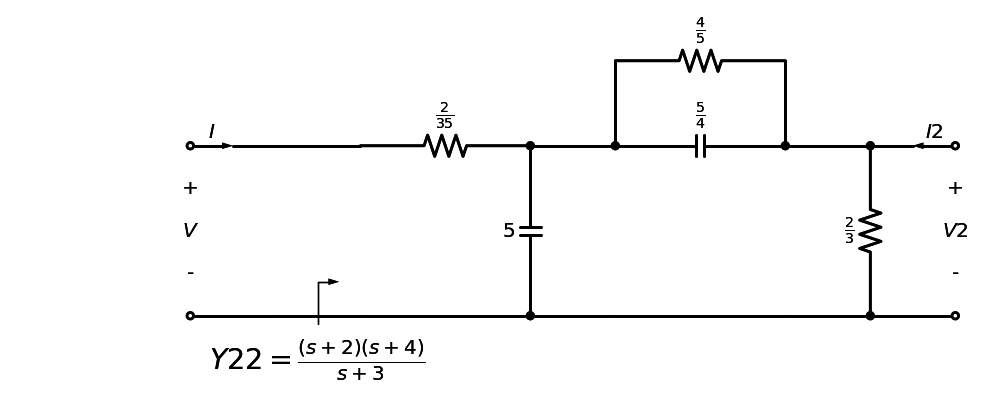

In [24]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, yy_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Y22',  
                                          Y22, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Resistor, R3)
d = dibujar_elemento_derivacion(d, Capacitor, C3)
d = dibujar_espacio_derivacion(d)
d = dibujar_tanque_RC_serie(d, R2, C2)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, Resistor, R1)
d = dibujar_puerto_salida(d, 
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')
display(d)

### Simulación Circuital:

<img src="./rsc/sim/ej2-y.png" align="center" width="1196" height="599" />   

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="anexo">
        <h1> ANEXO </h1>
    </a> 
</center>
</div>


In [25]:
IFrame("./rsc/resolucion.pdf", width=1000, height=1000)

------------------------